In [1]:
# Simple visualizations with matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

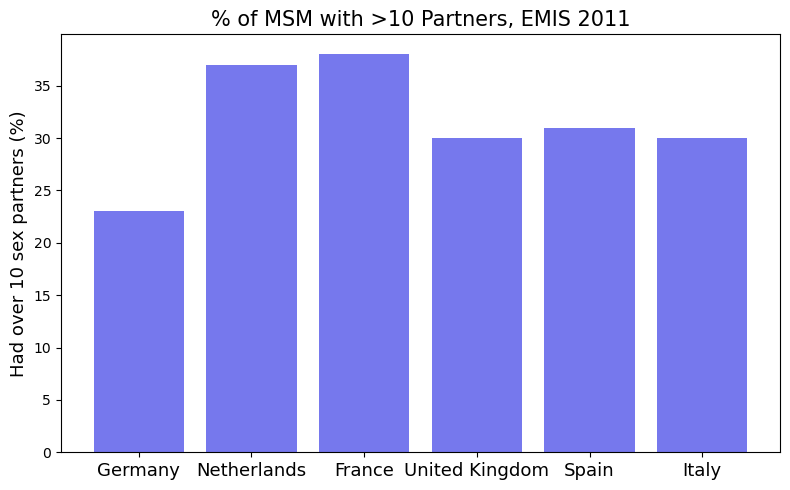

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

custom_palette = ['#3D348B','#7678ED','#F7B801','#F18701','#F35B04' ]
titlesize = 15
xticksize = 13
ylabelsize = 13
# Load & clean
df = pd.read_csv('emis_data_EMIS2011.csv')
df['Country'] = df['Country'].str.extract(r'\(([^)]+)\)')[0]

# Subset + re‐order
subset_countries = ['Germany', 'Netherlands', 'France', 'United Kingdom', 'Spain', 'Italy']
df_subset = df[df['Country'].isin(subset_countries)] \
              .set_index('Country') \
              .reindex(subset_countries) \
              .reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(
    df_subset['Country'],
    df_subset['Had over 10 sex partners in previous 12 months (%)'],
    color=custom_palette[1]
)
plt.ylabel('Had over 10 sex partners (%)', fontsize=ylabelsize)
plt.xticks(fontsize=xticksize)
plt.title('% of MSM with >10 Partners, EMIS 2011', fontsize=titlesize)
plt.tight_layout()
plt.show()

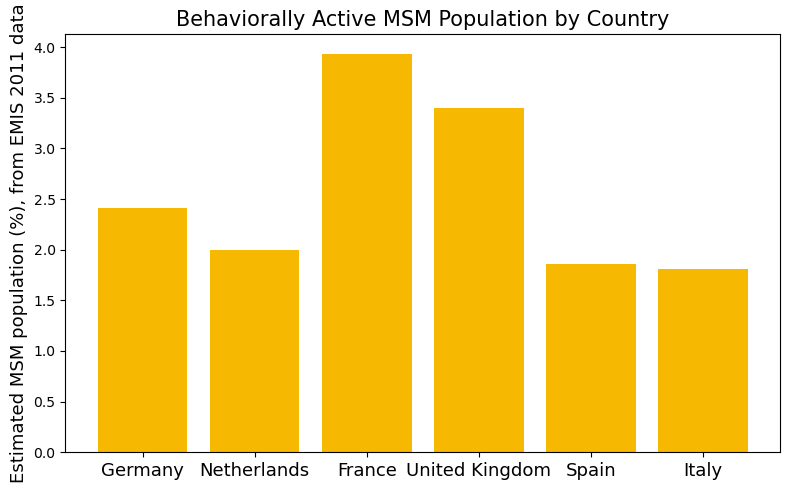

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
df = pd.read_csv('MSM_pops_EMIS2011.csv')

# Subset + re‐order (uses same subset_countries as above)
df_subset = df[df['Country'].isin(subset_countries)] \
              .set_index('Country') \
              .reindex(subset_countries) \
              .reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(
    df_subset['Country'],
    df_subset['Percent_adult_male'],
    color=custom_palette[2]
)
plt.ylabel('Estimated MSM population (%), from EMIS 2011 data', fontsize=ylabelsize)
plt.xticks(fontsize=xticksize)
plt.title('Behaviorally Active MSM Population by Country', fontsize=titlesize)
plt.tight_layout()
plt.show()

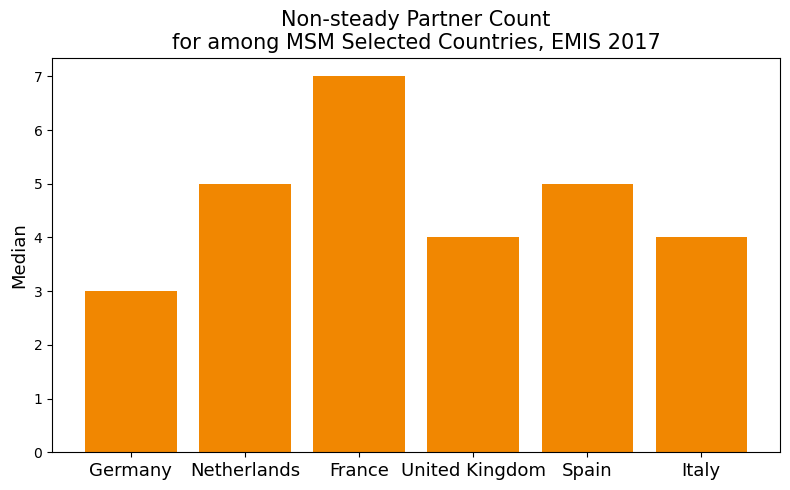

In [4]:
# Load & clean
df = pd.read_csv('emis_data_EMIS2017.csv')
df['Country'] = df['Country'].str.replace(r'.*\((.*)\).*', r'\1', regex=True)

# Subset + re‐order
df_sub = df[df['Country'].isin(subset_countries)] \
            .set_index('Country') \
            .reindex(subset_countries) \
            .reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(
    df_sub['Country'],
    df_sub['Median_nonsteady_partners_last12m'],
    color=custom_palette[3]
)
plt.xticks(fontsize = xticksize)
plt.ylabel('Median',fontsize = ylabelsize)
plt.title('Non-steady Partner Count\nfor among MSM Selected Countries, EMIS 2017',fontsize = titlesize)
plt.tight_layout()
plt.show()

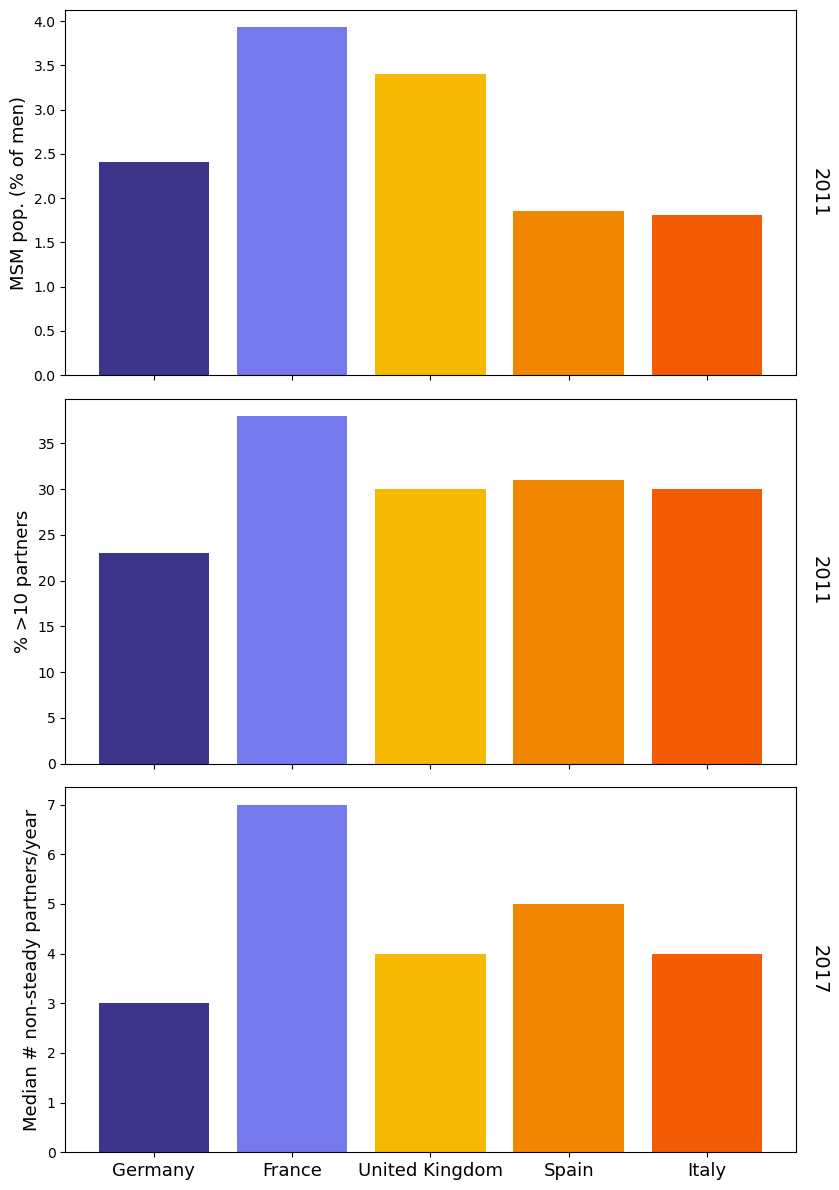

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

custom_palette = ['#3D348B', '#7678ED', '#F7B801', '#F18701', '#F35B04']
subset_countries = ['Germany', 'France', 'United Kingdom', 'Spain', 'Italy']

# 1. Load & preprocess EMIS-2011 (>10 partners)
df1 = pd.read_csv('emis_data_EMIS2011.csv')
df1['Country'] = df1['Country'].str.extract(r'\(([^)]+)\)')[0]
df1_sub = (
    df1[df1['Country'].isin(subset_countries)]
    .set_index('Country').reindex(subset_countries).reset_index()
)

# 2. Load & preprocess MSM population estimates
df2 = pd.read_csv('MSM_pops_EMIS2011.csv')
df2_sub = (
    df2[df2['Country'].isin(subset_countries)]
    .set_index('Country').reindex(subset_countries).reset_index()
)

# 3. Load & preprocess EMIS-2017 median non-steady partners
df3 = pd.read_csv('emis_data_EMIS2017.csv')
df3['Country'] = df3['Country'].str.replace(r'.*\((.*)\).*', r'\1', regex=True)
df3_sub = (
    df3[df3['Country'].isin(subset_countries)]
    .set_index('Country').reindex(subset_countries).reset_index()
)

# 4. Create stacked subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Middle: relative MSM population
axes[0].bar(df2_sub['Country'], df2_sub['Percent_adult_male'],
            color=custom_palette)
axes[0].set_ylabel('MSM pop. (% of men)', fontsize=13)
axes[0].text(1.02, 0.5, '2011', transform=axes[0].transAxes,
             rotation=270, va='center', fontsize=14)


# Top: % with >10 partners
axes[1].bar(df1_sub['Country'], df1_sub['Had over 10 sex partners in previous 12 months (%)'],
            color=custom_palette)
axes[1].set_ylabel('% >10 partners', fontsize=13)
axes[1].text(1.02, 0.5, '2011', transform=axes[1].transAxes,
             rotation=270, va='center', fontsize=14)



# Bottom: median non-steady partners
axes[2].bar(df3_sub['Country'], df3_sub['Median_nonsteady_partners_last12m'],
            color=custom_palette)
axes[2].set_ylabel('Median # non-steady partners/year', fontsize=13)
#axes[2].set_xlabel('Country', fontsize=13)
axes[2].text(1.02, 0.5, '2017', transform=axes[2].transAxes,
             rotation=270, va='center', fontsize=14)

# Only show xticks on bottom plot
for ax in axes[:-1]:
    ax.tick_params(labelbottom=False)
axes[-1].tick_params(axis='x', labelsize=13)

# Adjust layout to make room for vertical titles
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
